<a href="https://colab.research.google.com/github/Abhirup2017/MLnow_2.0/blob/main/EDA_%26_Univariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for assignment of the `ML.now()` course

`Univariate Linear Regression`

[Link to Download the dataset](https://drive.google.com/file/d/12538hF4aSIy9LTQvFH_HCq8mxhBomG2C/view?usp=sharing)

**Date Created**: June 6, 2021


**Author**:
Abhirup Bhattacharjee 

**Reach out**:
 [GitHub](https://github.com/Abhirup2017) | [LinkedIn](https://www.linkedin.com/in/abhirup-bhattacharjee-9aa676193?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3B0CB3yyVlRTGPEM0O9kCQFA%3D%3D)

[[Course Repository](https://github.com/Abhirup2017/MLnow_2.0)]

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
cd "/content/drive/MyDrive/Google Cllab_GirlScript"

/content/drive/MyDrive/Google Cllab_GirlScript


In [65]:
ls

 01_Perceptron_Training.ipynb       Pokemon_Data.csv
'EDA & Univariate Analysis.ipynb'   top_charts.csv


# Importing the important libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf #framework
from tensorflow import keras
import seaborn as sns

# Accessing the pokemon data set 

In [67]:
pokemon_data = pd.read_csv("/content/drive/MyDrive/Google Cllab_GirlScript/Pokemon_Data.csv") #reading the data using pandas

In [68]:
pokemon_data #printing the dataset

,Sr.no,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


 **So, we have 800 rows and 12 columns**

In [69]:
pokemon_data.head() #reading the first 5 rows

,Sr.no,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [70]:
pokemon_data.tail() #reading the last 5 rows

,Sr.no,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


## Here we are seeing each column's data type

In [71]:
pokemon_data.info(verbose = True) # using verbose =  True will give you each column's data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sr.no       800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


## Checking if there is any null value containing column

In [72]:
print(pokemon_data.isnull().values.any())

True


## Counting how many null values are there

In [73]:
null_columns=pokemon_data.columns[pokemon_data.isnull().any()]
pokemon_data[null_columns].isnull().sum()

Type 2    386
dtype: int64

Only, Type 2 column has 386 null values

## Printing null values with their respective index

In [74]:
print(pokemon_data[pokemon_data.isnull().any(axis="columns")][null_columns])

    Type 2
4      NaN
5      NaN
9      NaN
10     NaN
11     NaN
..     ...
775    NaN
776    NaN
788    NaN
789    NaN
792    NaN

[386 rows x 1 columns]


## Printing unique values

In [75]:
print(pokemon_data.nunique())

Sr.no         721
Name          800
Type 1         18
Type 2         18
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64


## Converting "Legendary" Column into 0,1 

False === 0

True === 1




In [76]:
pokemon_data["Legendary"] = pokemon_data["Legendary"].astype(int)
pokemon_data.head(3)

,Sr.no,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0


# **Explotary Data Analysis and Visualization**

Let's get some insight about this pokemon dataset

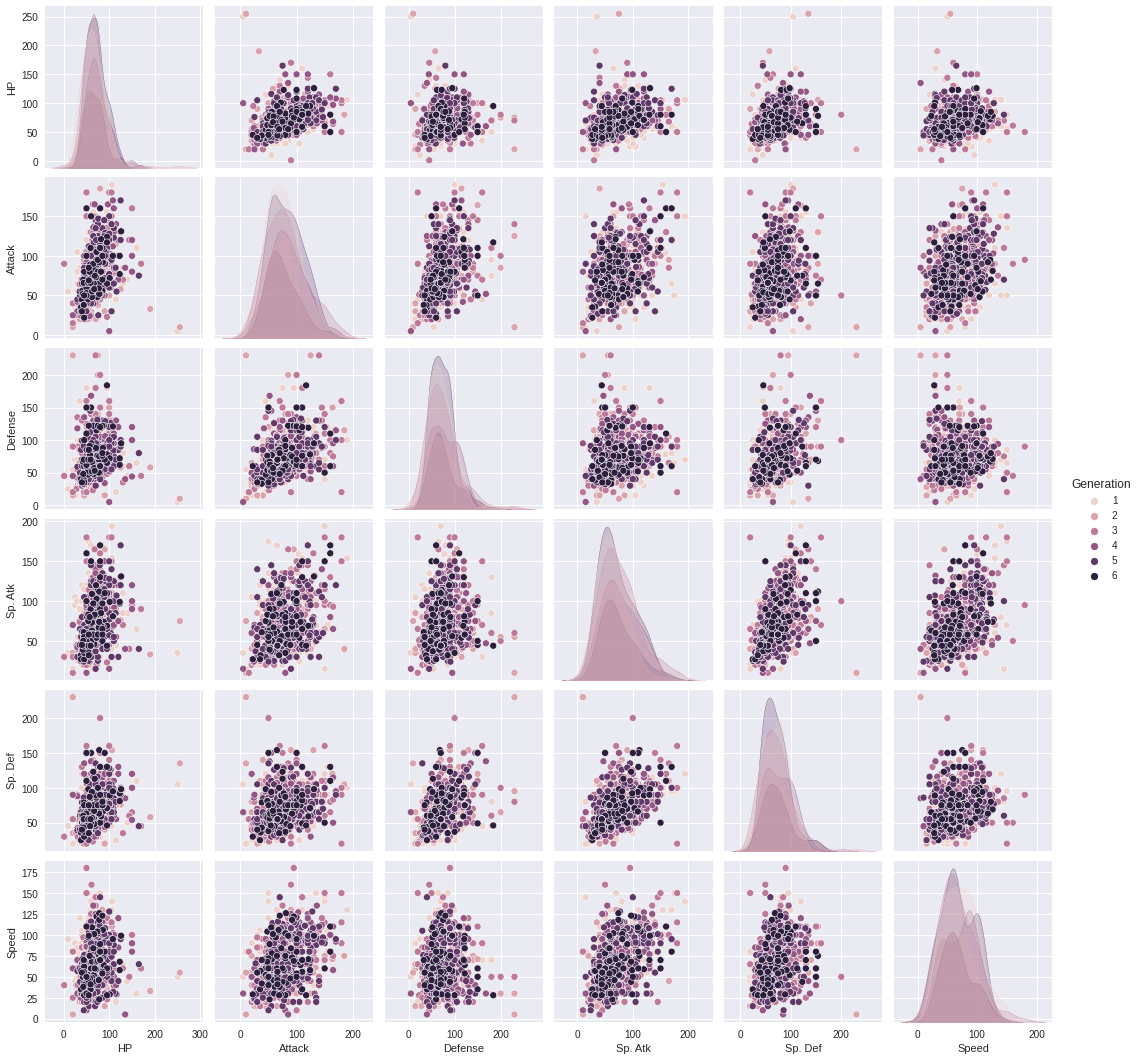

In [77]:
sns.pairplot(pokemon_data,vars=['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'],hue='Generation', diag_kind="kde")

## 1. Analyzing various statistics lie within the dataset

In [78]:
pokemon_data.describe()

,Sr.no,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


# 2. Let's check, how many pookemons are in Type 1 & Type 2

In [79]:
 type1 = pokemon_data["Type 1"].value_counts().reset_index()
 type1.columns= ["Type1", "Total"]
 type1

,Type1,Total
0,Water,112
1,Normal,98
2,Grass,70
3,Bug,69
4,Psychic,57
5,Fire,52
6,Rock,44
7,Electric,44
8,Ghost,32
9,Ground,32


In [80]:
type2 = pokemon_data["Type 2"].value_counts().reset_index()
type2.columns= ["Type2", "Total"]
type2

,Type2,Total
0,Flying,97
1,Ground,35
2,Poison,34
3,Psychic,33
4,Fighting,26
5,Grass,25
6,Fairy,23
7,Steel,22
8,Dark,20
9,Dragon,18


# Let's check how many Legendary & and Non_legendary pokemon we have and their percentage

In [81]:
legendary_pokemon = pokemon_data.loc[(pokemon_data["Legendary"]==True)]
len(legendary_pokemon)
Non_legendary_pokemon = pokemon_data.loc[(pokemon_data["Legendary"]==False)]
len(Non_legendary_pokemon)


print(f''' Total legendary & Non_legendary Pokemon we have : 
{len(legendary_pokemon), len(Non_legendary_pokemon)}

''')



 Total legendary & Non_legendary Pokemon we have : 
(65, 735)




## Thier percentage

In [82]:
print(f'''Unique values in column Legendary has :
{pokemon_data["Legendary"].unique()}

Total percentage of Legendary and Non-Legendary pokemon is :
{100*pokemon_data['Legendary'].value_counts()/len(pokemon_data['Legendary'])}

''')


Unique values in column Legendary has :
[0 1]

Total percentage of Legendary and Non-Legendary pokemon is :
0    91.875
1     8.125
Name: Legendary, dtype: float64




# Plotting this percentage on a pie_chart

*Creating a new dataframe*

In [96]:
Legendary_Non_Legendary = 100*pokemon_data['Legendary'].value_counts()/len(pokemon_data['Legendary'])
new_dataframe= Legendary_Non_Legendary.to_frame()
new_dataframe.columns=["Percentage"]
new_dataframe.index=["Non_Legendary", "Legendary"]
new_dataframe

,Percentage
Non_Legendary,91.875
Legendary,8.125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


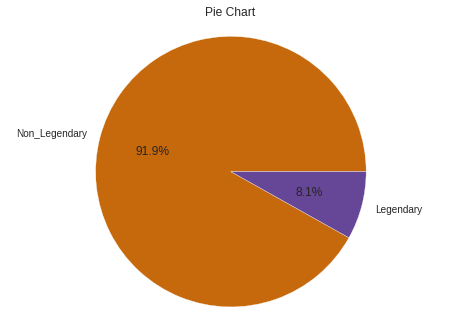

In [98]:
my_labels = 'Non_Legendary','Legendary'
plt.pie(new_dataframe,labels=my_labels,autopct='%1.1f%%')
plt.title('Pie Chart')
plt.axis('equal')
plt.show()

# Which Pokemons in Type 1 have highest Attack?

In [85]:
Median_Attack = pokemon_data.groupby("Type 1")['Attack'].median().reset_index()
Median_Attack

,Type 1,Attack
0,Bug,65.0
1,Dark,88.0
2,Dragon,113.5
3,Electric,65.0
4,Fairy,52.0
5,Fighting,100.0
6,Fire,84.5
7,Flying,85.0
8,Ghost,66.0
9,Grass,70.0


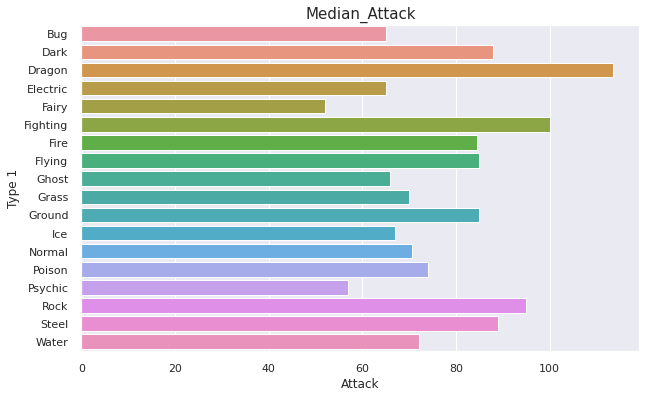

In [86]:
sns.set(rc = {"figure.figsize":[10,6]})
plt.title("Median_Attack",fontdict={"fontsize":15})
sns.barplot(x = "Attack", y="Type 1",data=Median_Attack)
plt.show()

So, Dragon Type pokemon has the highest attack and Fairy type pokemon has the lowest attack

# **Why did I choose Median instead of mean?**

Sometimes Mean can be affected by the outliers of the dataset where as median will be remain almost same. Let's comparison between "Mean of Attack" & "Median of Attack". 

Let's take a example!

Analyzing "HP" column with mean & median

In [87]:
Mean_HP= pokemon_data.groupby("Type 1")['HP'].mean().reset_index()
Median_HP = pokemon_data.groupby("Type 1")['HP'].median().reset_index()
Mean_med =pd.merge(Mean_HP, Median_HP , on= "Type 1")
Mean_med.rename(columns = {"HP_x":"Mean", "HP_y":"Median"}, inplace =True)
Mean_med

,Type 1,Mean,Median
0,Bug,56.884058,60.0
1,Dark,66.806452,65.0
2,Dragon,83.312500,80.0
3,Electric,59.795455,60.0
4,Fairy,74.117647,78.0
5,Fighting,69.851852,70.0
6,Fire,69.903846,70.0
7,Flying,70.750000,79.0
8,Ghost,64.437500,59.5
9,Grass,67.271429,65.5


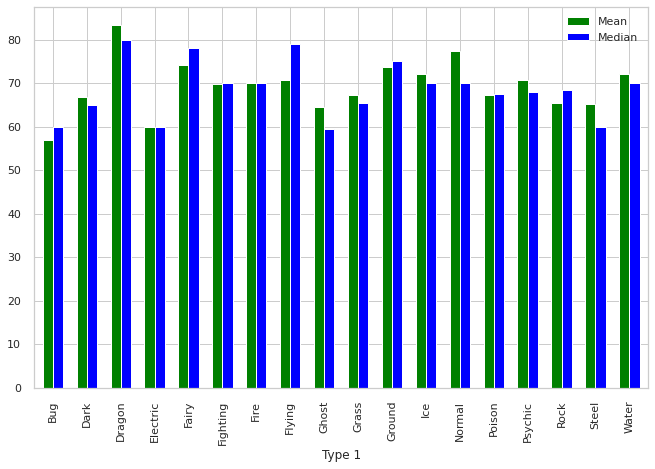

In [88]:
sns.set(rc = {"figure.figsize":[11,7]})
sns.set_style("whitegrid")
plt.ylabel=("Attack")
Mean_med.plot(x ="Type 1", y = ["Mean", "Median"], kind = 'bar', width = 0.6,color =[ "green","blue"])
plt.show()

So, For Normal Pokemon they have much much greater mean HP than median. Which is beacause of outliers.

# Let's check which pokemon has the highest Sp. Defense in Type 1 

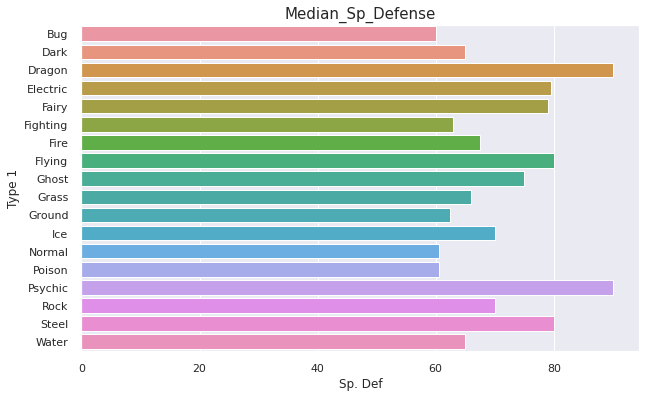

In [89]:
Median_Sp_Defense = pokemon_data.groupby("Type 1")['Sp. Def'].median().reset_index()

sns.set(rc = {"figure.figsize":[10,6]})
plt.title("Median_Sp_Defense",fontdict={"fontsize":15})
sns.barplot(x = "Sp. Def", y="Type 1",data=Median_Sp_Defense)
plt.show()

So, Dragon & Psychic has highest Sp.Def, where as Bug has lowest

In [90]:
print(f'''Unique values in column Legendary has :
{pokemon_data["Generation"].unique()}

Total percentage of Legendary and Non-Legendary pokemon is :
{100*pokemon_data['Generation'].value_counts()/len(pokemon_data['Generation'])}

''')

Unique values in column Legendary has :
[1 2 3 4 5 6]

Total percentage of Legendary and Non-Legendary pokemon is :
1    20.750
5    20.625
3    20.000
4    15.125
2    13.250
6    10.250
Name: Generation, dtype: float64




In [91]:
Generation = 100*pokemon_data['Generation'].value_counts()/len(pokemon_data['Generation'])
new_dataframe= Generation.to_frame()
new_dataframe.columns=["Percentage"]
new_dataframe.index=["Gen_1", "Gen_2", "Gen_3","Gen_4", "Gen_5", "Gen_6"]
new_dataframe

,Percentage
Gen_1,20.750
Gen_2,20.625
Gen_3,20.000
Gen_4,15.125
Gen_5,13.250
Gen_6,10.250


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


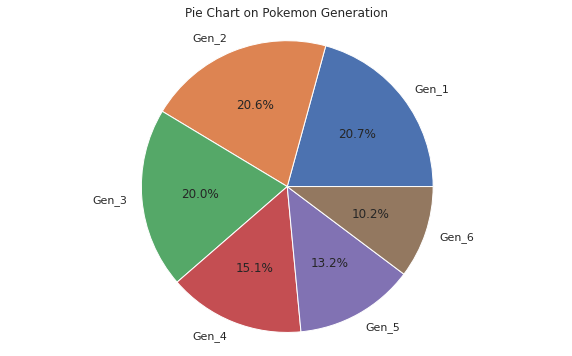

In [92]:
my_labels = "Gen_1", "Gen_2", "Gen_3","Gen_4", "Gen_5", "Gen_6"
plt.pie(new_dataframe,labels=my_labels,autopct='%1.1f%%')
plt.title('Pie Chart on Pokemon Generation')
plt.axis('equal')
plt.show()

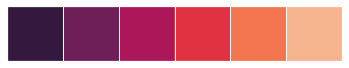

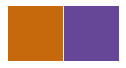

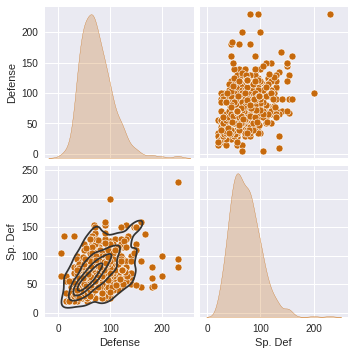

# Univariate Analysis 

## Agenda : Finding the Sp. def value given from the Defense value

$Y_i = X_i  \cdot \theta_1 + \theta_0$

Y = Sp. def

X = Defense

In [115]:
new_df = pokemon_data[['Defense', 'Sp. Def']]
new_df.head(3)

,Defense,Sp. Def
0,49,65
1,63,80
2,83,100


In [116]:
new_df.to_csv("pokemon_data_new")

In [118]:
ls

 01_Perceptron_Training.ipynb       Pokemon_Data.csv
'EDA & Univariate Analysis.ipynb'   pokemon_data_new


In [121]:
new_df2 = pd.read_csv("/content/drive/MyDrive/Google Cllab_GirlScript/pokemon_data_new")

In [ ]:
new_df2.drop('Unnamed: 0', inplace=True, axis=1)

In [144]:
new_df2.head()

,Defense,Sp. Def
0,49,65
1,63,80
2,83,100
3,123,120
4,43,50


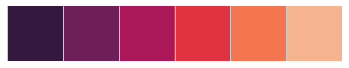

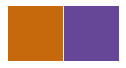

In [119]:
import seaborn as sns
sns.palplot(sns.color_palette("rocket")) #Purple to Orange colors
pal = sns.color_palette("rocket", 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

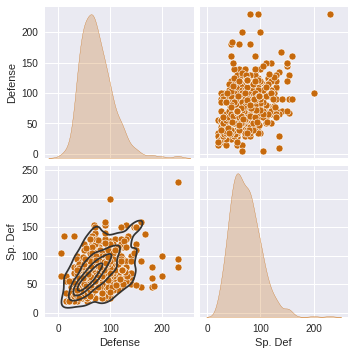

In [120]:
sns_data= sns.pairplot(pokemon_data,
             x_vars = ['Defense', 'Sp. Def'],
             y_vars =  ['Defense', 'Sp. Def'],
       
        diag_kind="kde"
             )
sns_data.map_lower(sns.kdeplot, levels=5, color=".2")

## Box plots

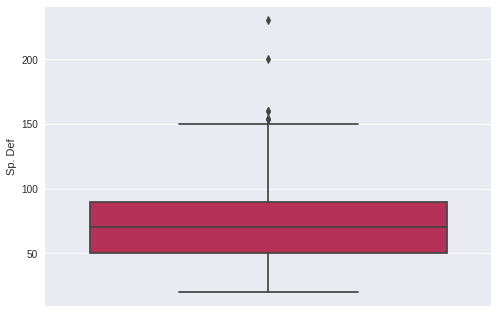

In [154]:
sns.boxplot(y=new_df2['Sp. Def'],palette='rocket')

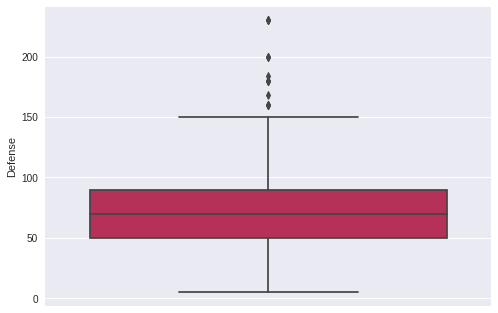

In [155]:
sns.boxplot(y=new_df2['Defense'],palette='rocket')

TypeError: ignored

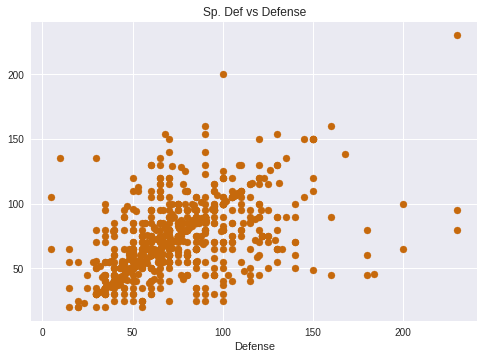

In [152]:
plt.grid(True)


plt.scatter(new_df2['Defense'],new_df2['Sp. Def'])
plt.title('Sp. Def vs Defense')
plt.xlabel('Defense')
plt.ylabel('Sp. Def')
plt.figure(figsize=(40,40))
plt.show()

**Coudn't able to find the error! Why is it happening mam??**

# Let's check the cor relation between the two variables. 

## Does they really have any relationship?

In [153]:
new_df2.corr() 

,Defense,Sp. Def
Defense,1.000000,0.510747
Sp. Def,0.510747,1.000000


Well, some say that cor=>.51 is a good relationship for two variables. 

# Let's plot the Heat map now 

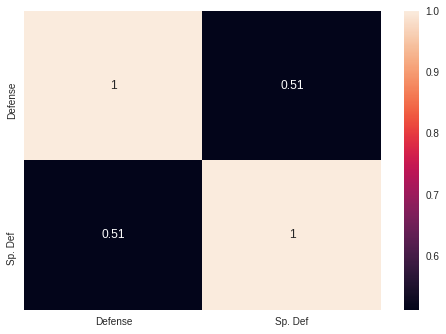

In [157]:
sns.heatmap(new_df2.corr(),annot=True,cmap="rocket")

## Let's have a look into the Strip plot

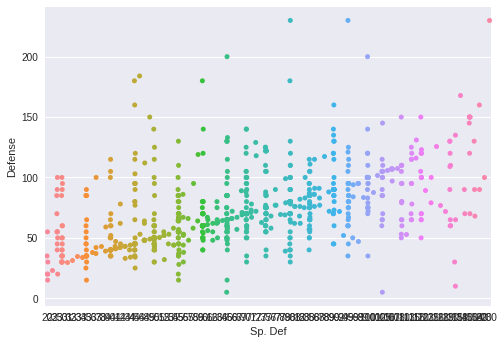

In [158]:
sns.stripplot(x = 'Sp. Def', y = 'Defense', data = new_df2)

## Now is the time to split the **new_df2** dataset into parts

In [182]:
#75-25 train-test percent split

my_trainDataset = new_df2.sample(frac=0.75, random_state=1) 
my_testDataset = new_df2.drop(my_trainDataset.index)

print(my_trainDataset.head())
print(my_testDataset.head())

     Defense  Sp. Def
8         78      115
510       75       85
175       34       45
735       58       54
242       75       75
    Defense  Sp. Def
7       111       85
10       80       80
15       50       80
20       40       35
21       55       50


In [183]:
print(trainDataset.shape)
print(testDataset.shape)

(600, 2)
(200, 2)


In [184]:
model_trainFeatures = my_trainDataset.copy()
model_testFeatures = my_testDataset.copy()

print(model_trainFeatures.head())
print(model_testFeatures.head())

     Defense  Sp. Def
8         78      115
510       75       85
175       34       45
735       58       54
242       75       75
    Defense  Sp. Def
7       111       85
10       80       80
15       50       80
20       40       35
21       55       50


In [185]:
#removing the 'Defense' column and saving it into the labels variable

model_trainLabels = model_trainFeatures.pop('Defense')
model_testLabels = model_testFeatures.pop('Defense')

print(model_trainLabels.head())
print(model_testLabels.head())

8      78
510    75
175    34
735    58
242    75
Name: Defense, dtype: int64
7     111
10     80
15     50
20     40
21     55
Name: Defense, dtype: int64


In [186]:
print(model_trainFeatures.head()) #Printng the feature dataframe
print(model_testFeatures.head())

     Sp. Def
8        115
510       85
175       45
735       54
242       75
    Sp. Def
7        85
10       80
15       80
20       35
21       50


# Building my model with keras

In [189]:
#for univariate num of feayure will be -> num(features) = 1

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

In [190]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'SGD', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [191]:
numEpochs = 1500
history = model.fit(x = model_trainFeatures, y = model_trainLabels, validation_data = (model_testFeatures, model_testLabels), epochs = numEpochs)

Epoch 1/1500
19/19 [==============================] - 1s 11ms/step - loss: 54.4166 - mae: 54.4166 - mse: 4201.9419 - val_loss: 54.0990 - val_mae: 54.0990 - val_mse: 3974.0869
Epoch 2/1500
19/19 [==============================] - 0s 2ms/step - loss: 53.2200 - mae: 53.2200 - mse: 4038.2563 - val_loss: 52.8716 - val_mae: 52.8716 - val_mse: 3809.5962
Epoch 3/1500
19/19 [==============================] - 0s 2ms/step - loss: 52.0201 - mae: 52.0201 - mse: 3871.6853 - val_loss: 51.6511 - val_mae: 51.6511 - val_mse: 3650.2998
Epoch 4/1500
19/19 [==============================] - 0s 2ms/step - loss: 50.8275 - mae: 50.8275 - mse: 3714.4221 - val_loss: 50.4378 - val_mae: 50.4378 - val_mse: 3495.5654
Epoch 5/1500
19/19 [==============================] - 0s 2ms/step - loss: 49.6612 - mae: 49.6612 - mse: 3566.8113 - val_loss: 49.2108 - val_mae: 49.2108 - val_mse: 3342.7346
Epoch 6/1500
19/19 [==============================] - 0s 3ms/step - loss: 48.4912 - mae: 48.4912 - mse: 3413.5598 - val_loss: 48.

**Why the val_loss is not decreasing too 0 mam? Did I choose the wrong dataset??**

In [192]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


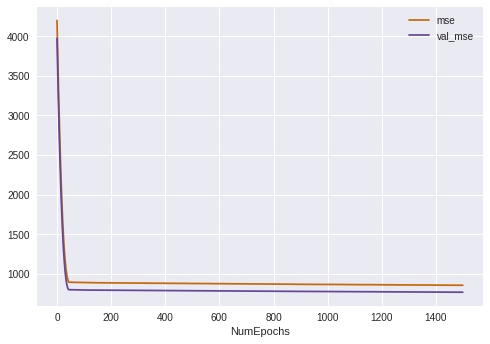

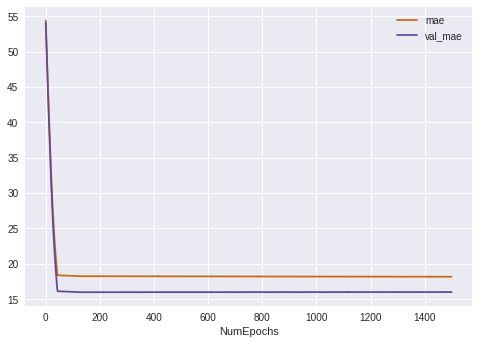

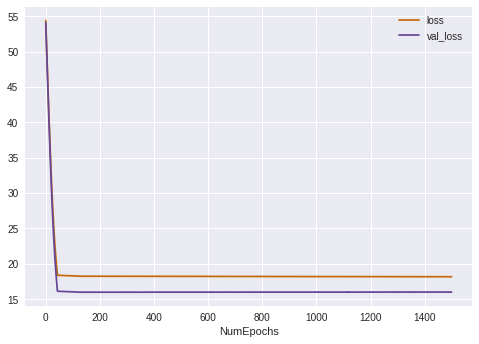

In [194]:
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [195]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[4.2268066]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[4.2268066]
 [5.171871 ]
 [6.1169357]
 [7.062    ]
 [8.007065 ]]

List of Predictions (flattened out):
[4.2268066 5.171871  6.1169357 7.062     8.007065 ]



As you see my val_loss is 15.56, and it's giving "4.2268066" for input  . Why mam? Shoudn't it be 16.56?

In [197]:
print(model_testFeatures)

     Sp. Def
7         85
10        80
15        80
20        35
21        50
..       ...
767       59
770      130
782       55
789       46
790       40

[200 rows x 1 columns]


In [201]:
print(len(model_testLabels))
print(model_testLabels)

200
7      111
10      80
15      50
20      40
21      55
      ... 
767    119
770     65
782     70
789    184
790     35
Name: Defense, Length: 200, dtype: int64
